In [2]:
!pip install pandas altair matplotlib seaborn scikit-learn


In [4]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import stats


In [16]:
# Load the dataset
threatened = pd.read_csv("Threatened species.csv")


In [18]:


# Filter the dataset to only include 'Region', 'Year', 'Series', and 'Value'
filtered_data = threatened[['Region', 'Year', 'Series', 'Value']]

# Display the first few rows of the filtered dataset to check
print(filtered_data.head())


        Region  Year                                    Series Value
0  Afghanistan  2004  Threatened Species: Vertebrates (number)    31
1  Afghanistan  2010  Threatened Species: Vertebrates (number)    31
2  Afghanistan  2015  Threatened Species: Vertebrates (number)    31
3  Afghanistan  2020  Threatened Species: Vertebrates (number)    33
4  Afghanistan  2021  Threatened Species: Vertebrates (number)    38


In [22]:
# Save the filtered dataset to a CSV file
filtered_data.to_csv('Filtered_Threatened_species.csv', index=False)


In [24]:
# Load the saved filtered dataset
filtered_data = pd.read_csv("Filtered_Threatened_species.csv")


## Principal Component Analysis (PCA) of Threatened Species Data  

### **Objective:**  
Principal Component Analysis (PCA) is used to **reduce dimensionality** while preserving key patterns in the dataset.  
This visualization helps to identify clusters among regions based on the number of threatened species over time.

/var/folders/5f/7c392y0j4ldggl_xs3vt29rh0000gn/T/ipykernel_8175/1757322630.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_10_regions['Value'] = filtered_data_10_regions['Value'].replace({',': ''}, regex=True).astype(float)
/var/folders/5f/7c392y0j4ldggl_xs3vt29rh0000gn/T/ipykernel_8175/1757322630.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_10_regions['Year'] = pd.to_numeric(filtered_data_10_regions['Year'], errors='coerce')


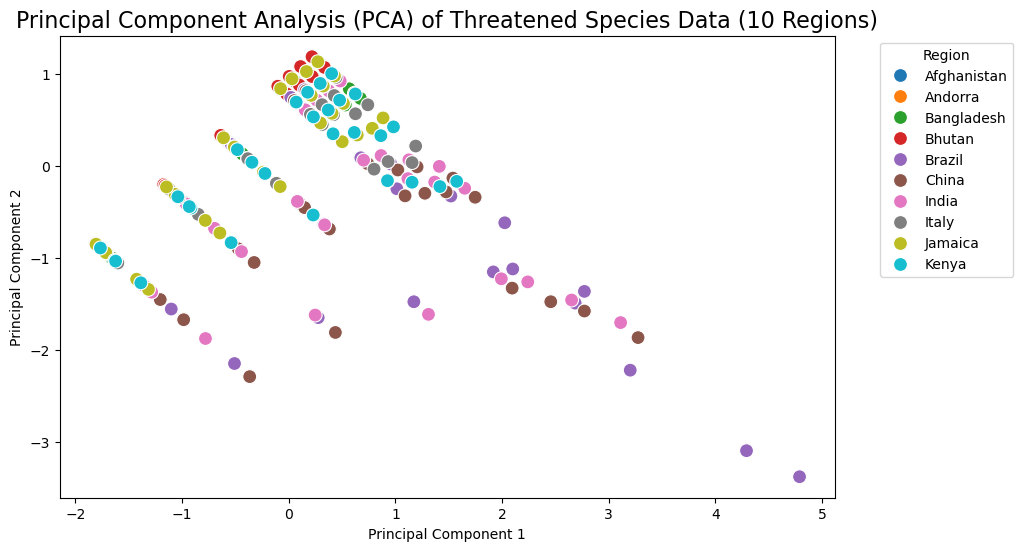

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the filtered dataset
filtered_data = pd.read_csv("Filtered_Threatened_species.csv")

# Select the 10 regions you want to include
selected_regions = ['India', 'Italy', 'Afghanistan', 'Brazil', 'China', 'Jamaica', 'Andorra', 'Bhutan', 'Bangladesh', 'Kenya']

# Filter the dataset to include only these regions
filtered_data_10_regions = filtered_data[filtered_data['Region'].isin(selected_regions)]

# Ensure 'Value' has no commas and is numeric
filtered_data_10_regions['Value'] = filtered_data_10_regions['Value'].replace({',': ''}, regex=True).astype(float)

# Convert 'Year' to numeric, handling errors as NaN
filtered_data_10_regions['Year'] = pd.to_numeric(filtered_data_10_regions['Year'], errors='coerce')

# Drop rows with missing values for PCA (if any NaNs exist)
filtered_data_10_regions = filtered_data_10_regions.dropna(subset=['Year', 'Value'])

# Select relevant columns for PCA
pca_data = filtered_data_10_regions[['Year', 'Value']]

# Standardize the data (PCA works best with standardized data)
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# Perform PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pca_data_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Add region data to the PCA dataframe
pca_df['Region'] = filtered_data_10_regions['Region'].values

# Plot the PCA result with different colors for each region
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='Region', palette='tab10', s=100)  # `palette='tab10'` ensures distinct colors
plt.title('Principal Component Analysis (PCA) of Threatened Species Data (10 Regions)', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()


## Pairwise Scatterplot Matrix (GGpairs)  

### **Objective:**  
A **pairwise scatterplot matrix** allows us to visualize relationships between numerical variables (`Year` and `Value`).  
This helps in identifying **correlations, clusters, and patterns** in the dataset across different regions.

/var/folders/5f/7c392y0j4ldggl_xs3vt29rh0000gn/T/ipykernel_8175/2757065690.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_10_regions['Value'] = filtered_data_10_regions['Value'].replace({',': ''}, regex=True).astype(float)
/var/folders/5f/7c392y0j4ldggl_xs3vt29rh0000gn/T/ipykernel_8175/2757065690.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_10_regions['Year'] = pd.to_numeric(filtered_data_10_regions['Year'], errors='coerce')


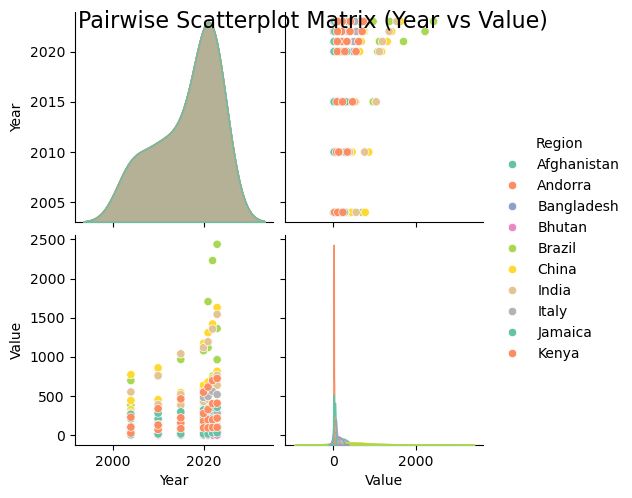

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the filtered dataset
filtered_data = pd.read_csv("Filtered_Threatened_species.csv")

# Select the 10 regions you want to include
selected_regions = ['India', 'Italy', 'Afghanistan', 'Brazil', 'China', 'Jamaica', 'Andorra', 'Bhutan', 'Bangladesh', 'Kenya']

# Filter the dataset to include only these regions
filtered_data_10_regions = filtered_data[filtered_data['Region'].isin(selected_regions)]

# Ensure 'Value' has no commas and is numeric
filtered_data_10_regions['Value'] = filtered_data_10_regions['Value'].replace({',': ''}, regex=True).astype(float)

# Convert 'Year' to numeric, handling errors as NaN
filtered_data_10_regions['Year'] = pd.to_numeric(filtered_data_10_regions['Year'], errors='coerce')

# Drop rows with missing values for analysis
filtered_data_10_regions = filtered_data_10_regions.dropna(subset=['Year', 'Value'])

# Pairwise scatterplot matrix to visualize relationships between variables
sns.pairplot(filtered_data_10_regions, vars=['Year', 'Value'], hue='Region', palette='Set2', markers='o')

# Show plot
plt.suptitle('Pairwise Scatterplot Matrix (Year vs Value)', fontsize=16)
plt.show()


## Correlation Heatmap (Year vs. Value)  

### **Objective:**  
A **correlation heatmap** helps us understand the relationship between numerical variables in the dataset.  
This visualization shows how **Year** (time) and **Value** (number of threatened species) are correlated.  

/var/folders/5f/7c392y0j4ldggl_xs3vt29rh0000gn/T/ipykernel_8175/2525657441.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_10_regions['Value'] = filtered_data_10_regions['Value'].replace({',': ''}, regex=True).astype(float)
/var/folders/5f/7c392y0j4ldggl_xs3vt29rh0000gn/T/ipykernel_8175/2525657441.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_10_regions['Year'] = pd.to_numeric(filtered_data_10_regions['Year'], errors='coerce')


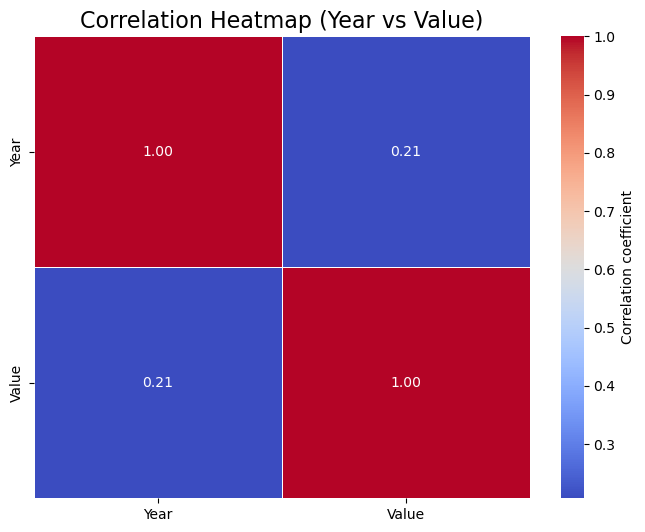

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the filtered dataset
filtered_data = pd.read_csv("Filtered_Threatened_species.csv")

# Select the 10 regions you want to include
selected_regions = ['India', 'Italy', 'Afghanistan', 'Brazil', 'China', 'Jamaica', 'Andorra', 'Bhutan', 'Bangladesh', 'Kenya']

# Filter the dataset to include only these regions
filtered_data_10_regions = filtered_data[filtered_data['Region'].isin(selected_regions)]

# Ensure 'Value' has no commas and is numeric
filtered_data_10_regions['Value'] = filtered_data_10_regions['Value'].replace({',': ''}, regex=True).astype(float)

# Convert 'Year' to numeric, handling errors as NaN
filtered_data_10_regions['Year'] = pd.to_numeric(filtered_data_10_regions['Year'], errors='coerce')

# Drop rows with missing values for analysis
filtered_data_10_regions = filtered_data_10_regions.dropna(subset=['Year', 'Value'])

# Select relevant columns for correlation analysis
correlation_data = filtered_data_10_regions[['Year', 'Value']]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Heatmap (Year vs Value)', fontsize=16)
plt.show()


In [59]:
!pip install altair-viewer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 844.5/844.5 kB 30.6 MB/s eta 0:00:00


## Boxplot: Distribution of Threatened Species by Region  

### **Objective:**  
A **boxplot** is used to visualize the **distribution, central tendency, and spread** of the number of threatened species (`Value`) across different regions.  
It helps in identifying **outliers, variability, and differences** in species threats among the selected regions.  

In [66]:
import altair as alt
import pandas as pd

# Load the filtered dataset
filtered_data = pd.read_csv("Filtered_Threatened_species.csv")

# Select the 8 regions you want to include
selected_regions = ['India', 'Italy', 'Afghanistan', 'Brazil', 'China', 'Jamaica', 'Kenya', 'Greece']

# Filter the dataset to include only these regions
filtered_data_8_regions = filtered_data[filtered_data['Region'].isin(selected_regions)]

# Ensure 'Value' has no commas and is numeric using .loc to avoid warnings
filtered_data_8_regions.loc[:, 'Value'] = filtered_data_8_regions['Value'].replace({',': ''}, regex=True).astype(float)

# Convert 'Year' to numeric, handling errors as NaN
filtered_data_8_regions.loc[:, 'Year'] = pd.to_numeric(filtered_data_8_regions['Year'], errors='coerce')

# Create an Altair boxplot
boxplot = alt.Chart(filtered_data_8_regions).mark_boxplot().encode(
    x='Region:N',  # Nominal data for categorical x-axis (Region)
    y='Value:Q',  # Quantitative data for y-axis (Value)
    color='Region:N',  # Color the boxplots by Region
    tooltip=['Region', 'Value']  # Show region and value when hovering
).properties(
    title="Boxplot: Distribution of Threatened Species by Region (Selected Regions)"
)

# Display the plot without using `show()`
boxplot


/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

## Density Plot: Distribution of Threatened Species by Region  

### **Objective:**  
A **density plot** helps visualize the **distribution** of the number of threatened species (`Value`) across different regions.  
This plot enables us to identify **patterns, peaks, and variations** in species threats among selected countries.  


/var/folders/5f/7c392y0j4ldggl_xs3vt29rh0000gn/T/ipykernel_8175/102629847.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/5f/7c392y0j4ldggl_xs3vt29rh0000gn/T/ipykernel_8175/102629847.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



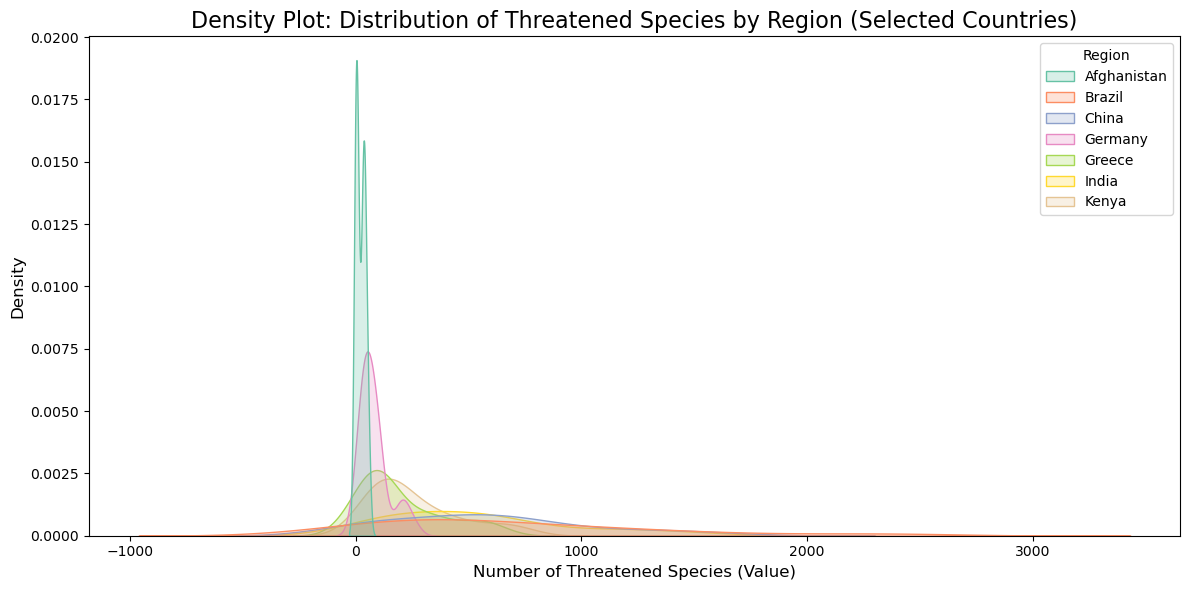

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the filtered dataset
filtered_data = pd.read_csv("Filtered_Threatened_species.csv")

# Select the regions (countries) you want to include (you can add more here)
selected_regions = ['India', 'Afghanistan', 'Brazil', 'China', 'Kenya', 'Greece', 
                    'USA', 'Germany']

# Filter the dataset to include only these regions
filtered_data_selected_regions = filtered_data[filtered_data['Region'].isin(selected_regions)]

# Ensure 'Value' has no commas and is numeric (clean the data if necessary)
filtered_data_selected_regions['Value'] = filtered_data_selected_regions['Value'].replace({',': ''}, regex=True).astype(float)

# Convert 'Year' to numeric, handling errors as NaN
filtered_data_selected_regions['Year'] = pd.to_numeric(filtered_data_selected_regions['Year'], errors='coerce')

# Create a density plot for the 'Value' distribution across different regions
plt.figure(figsize=(12, 6))  # Adjust the figure size for better readability
sns.kdeplot(data=filtered_data_selected_regions, x='Value', hue='Region', fill=True, common_norm=False, palette='Set2')

# Adding title and labels
plt.title('Density Plot: Distribution of Threatened Species by Region (Selected Countries)', fontsize=16)
plt.xlabel('Number of Threatened Species (Value)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
